In [1]:
from functions import *

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from multiprocessing import Pool, cpu_count

# high quality figures 
plt.rcParams['figure.dpi'] = 200  # Higher DPI for better quality
plt.rcParams['figure.figsize'] = [3.5, 3.5]  # Smaller physical size but still high quality

## **Modelling the Lee Model**

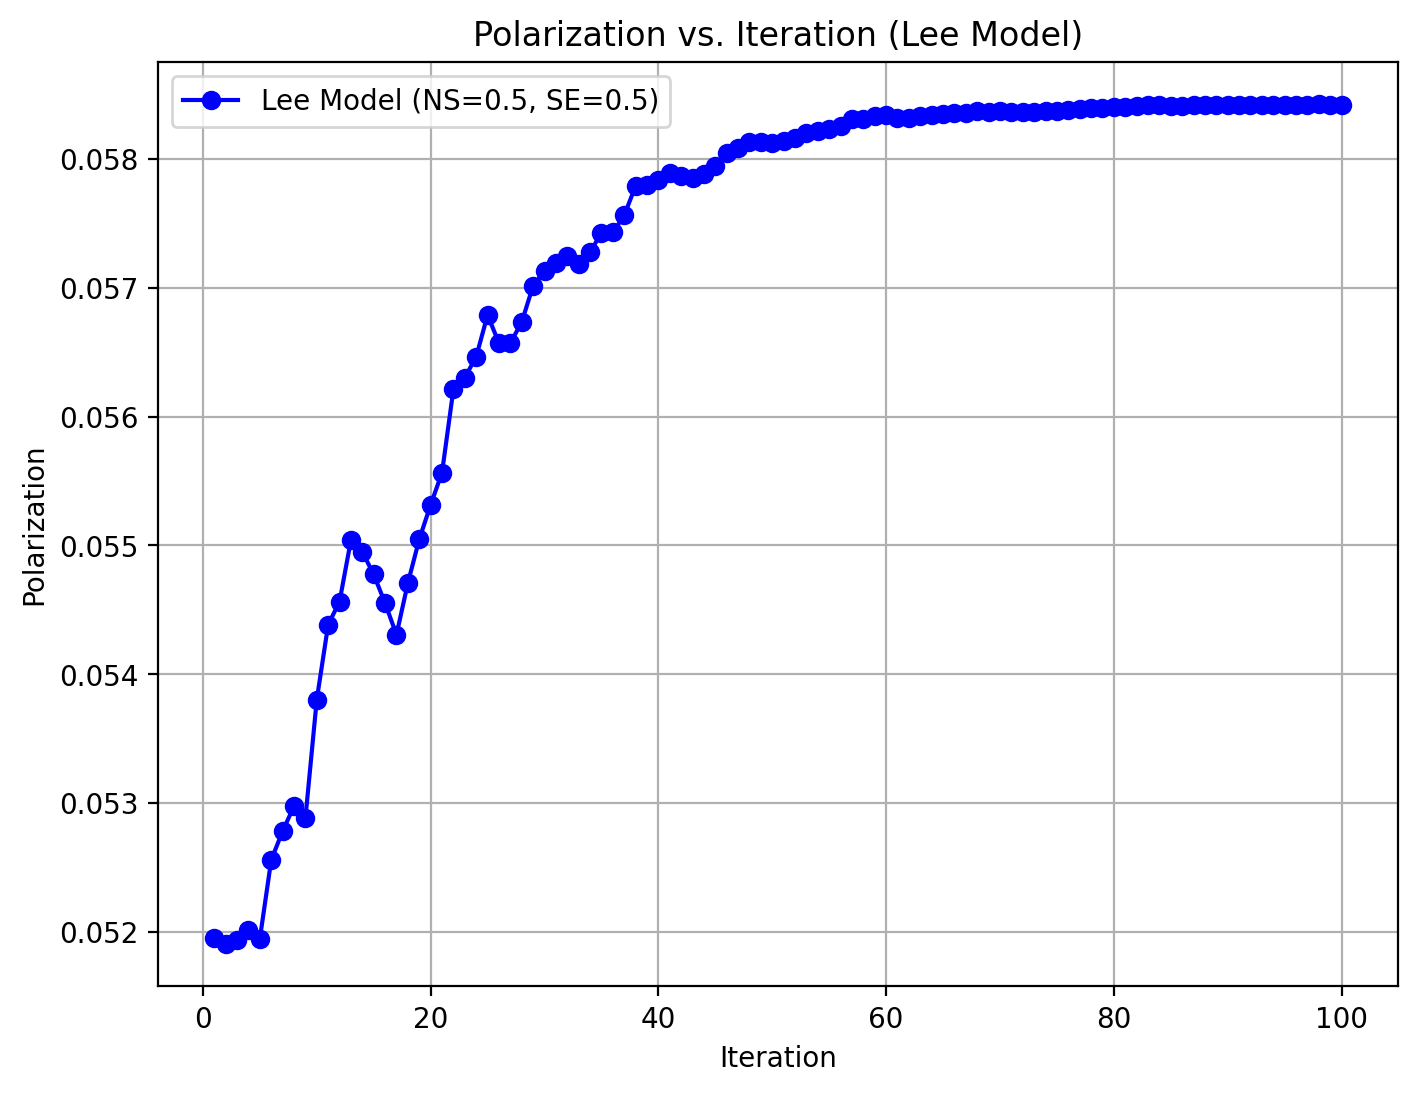

In [12]:
# ---------------------------
# PARAMETERS
# ---------------------------
num_caves       = 20             # Number of caves/clusters
cave_size       = 5              # Nodes per cave; total agents N = num_caves * cave_size
N               = num_caves * cave_size
K               = 2              # Number of opinion dimensions
NS              = 0.5            # Fraction of dimensions that are segregated
SE              = 0.5            # Structural Embeddedness parameter (0 <= SE <= 1)
num_iterations  = 100            # Each iteration = N time steps
allow_negative  = True           # Using negative influence allowed (default for Lee)
tie_addition_iter = None         # No extra tie addition later
p_random_new    = None           # Not needed if no tie addition

# ---------------------------
# INITIALIZATION
# ---------------------------
# Create a caveman network without random ties added at initialization
G = initialize_network(num_caves, cave_size, add_random_ties=False, p_random=0.03)

# Initialize opinions using the Lee model version.
# This function assigns segregated opinions for a fraction NS of the dimensions.
# It also returns a groups vector (which we don't use further here, but is available for analysis).
S = initialize_opinions_Lee(N, K, NS, cave_size)

# Compute the initial weight matrix (using the standard function)
W = compute_weights(S, allow_negative=allow_negative)

# ---------------------------
# RUN SIMULATION (LEE MODEL)
# ---------------------------
# run_simulation_Lee() uses the pre-computed tie activation probability matrix T (based on SE)
polarization_history, S_final, W_final = run_simulation_Lee(
    graph = G,
    S = S,
    W = W,
    num_iterations = num_iterations,
    SE = SE,
    allow_negative = allow_negative,
    tie_addition_iter = tie_addition_iter,
    p_random_new = p_random_new
)

# ---------------------------
# PLOTTING RESULTS
# ---------------------------
iterations = np.arange(1, num_iterations + 1)
plt.figure(figsize=(8, 6))
plt.plot(iterations, polarization_history, marker='o', color='blue', label="Lee Model (NS=0.5, SE=0.5)")
plt.xlabel("Iteration")
plt.ylabel("Polarization")
plt.title("Polarization vs. Iteration (Lee Model)")
plt.legend()
plt.grid(True)
plt.show()
